# kNN

El algoritmo kNN (K-nereast neighbors) es un algoritmo de aprendizaje supervisado no parametrico.
Se usa tanto para clasificacion como en la regresion.
Este parte del supuesto de que los datos similares estan cerca unos de otros en el espacio de caracteristicas.

# Modelo matematico

El modelo matematico de kNN se basa en la medicion de distancias entre puntos en un espacio de caracteristicas para determinar la clase de un dato nuevo.

Suponiendo que se tiene un conjunto de entrenamiento.
D={(x_1,y_1), (x_2,y_2),...,(x_n,y_n)} donde:
x_i E Rd es un vector de caracteristicas de dimension d.
y_i E Y es la etiqueta o clase correspondiente.


# Codigo

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


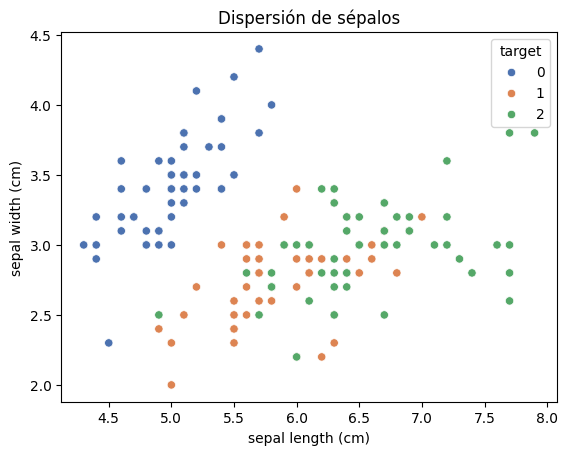

In [14]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Estadísticas descriptivas
print(df.describe())

# Gráfico de dispersión
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='deep')
plt.title('Dispersión de sépalos')
plt.show()

Feature Engineering

In [15]:
# Selección de características
X = df[iris.feature_names]  # Todas las características
y = df['target']            # Etiquetas

# Ver correlaciones
print("Correlación entre variables:")
print(df.corr()['target'].sort_values(ascending=False))

Correlación entre variables:
target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64


Prediccion con kNN

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Función de predicción
def predecir_clase(patron):
    patron_escalado = scaler.transform([patron])
    clase = knn.predict(patron_escalado)
    print(f'Clase predicha: {iris.target_names[clase[0]]}')
    return clase[0]

# Ejemplo de uso
predecir_clase([5.1, 3.5, 1.4, 0.2])  # Setosa

Clase predicha: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(0)

Evaluacion del modelo

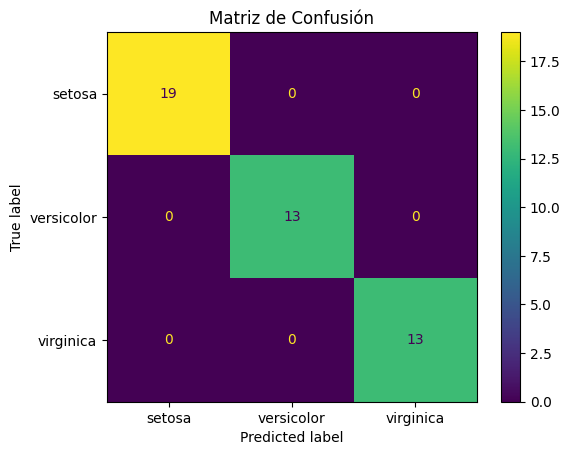

Precisión del modelo (Accuracy): 1.00


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Reentrenar y predecir
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot()
plt.title('Matriz de Confusión')
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo (Accuracy): {acc:.2f}')

# Referencias

- Hastie, T., Tibshirani, R., & Friedman, J. (2009).
The Elements of Statistical Learning: Data Mining, Inference, and Prediction.
Springer.
- Cover, T. M., & Hart, P. E. (1967).
Nearest neighbor pattern classification.
IEEE Transactions on Information Theory, 13(1), 21–27
